**Brian Blaylock**  
*July 20, 2021*

# GFS Data
The product names are not as simple as the HRRR dataset, but we can still get GFS data.

In [12]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [13]:
H = Herbie("2021-07-11", model="gfs", product="pgrb2.0p25")

🏋🏻‍♂️ Found 2021-Jul-11 00:00 UTC F00 [GFS] [product=pgrb2.0p25] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [14]:
H.SOURCES

{'aws': 'https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'aws-old': 'https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210711/00/gfs.t00z.pgrb2.0p25.f000',
 'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'google': 'https://storage.googleapis.com/global-forecast-system/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'azure': 'https://noaagfs.blob.core.windows.net/gfs/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000'}

In [15]:
x = H.xarray("^TMP:2 m above")

📇 Download subset: [GFS] model [pgrb2.0p25] product run at 2021-Jul-11 00:00 UTC F00                                                            
 cURL from https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000
   1: GRIB_message=580 TMP:2 m above ground:anl


Text(0.0, 1.0, 'GFS: common fields, 0.25 degree resolution')

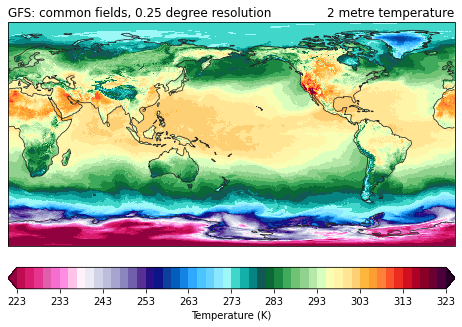

In [16]:
ax = common_features(crs=x.herbie.crs, figsize=[8, 8]).ax
p = ax.pcolormesh(
    x.longitude, x.latitude, x.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(x.t2m.GRIB_name, loc="right")
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc="left")

Text(0.0, 1.0, 'GFS: common fields, 0.25 degree resolution')

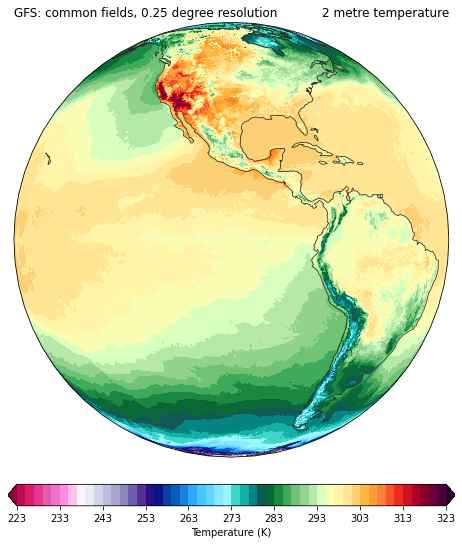

In [17]:
ax = common_features(
    crs=ccrs.Geostationary(central_longitude=-100), figsize=[10, 10]
).ax

p = ax.pcolormesh(
    x.longitude, x.latitude, x.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    shrink=0.8,
    **cm_tmp(units="K").cbar_kwargs,
)

ax.set_title(x.t2m.GRIB_name, loc="right")
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc="left")

## Can also use metpy to parse GFS grid_mapping
This works because Herbie attempts to parse the grid_mapping from the cfgrib GRIB info.

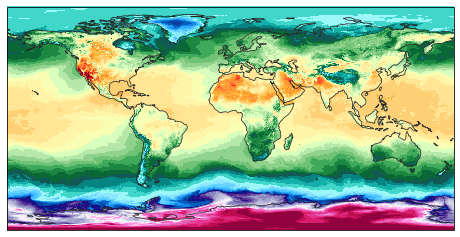

In [18]:
crs = x.metpy.parse_cf().metpy_crs.item().to_cartopy()
ax = common_features(crs=crs, figsize=[8, 8]).ax
p = ax.pcolormesh(
    x.longitude, x.latitude, x.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)

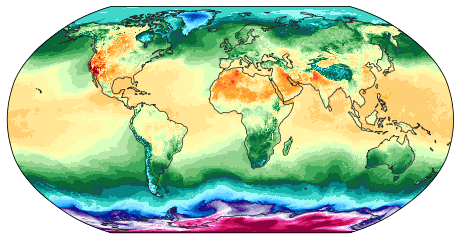

In [20]:
ax = common_features(crs=ccrs.Robinson(), figsize=[8, 8]).ax
p = ax.pcolormesh(
    x.longitude, x.latitude, x.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)

## Get data from the GFS wave output

In [4]:
H = Herbie("2021-07-11", model="gfs_wave")

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:205: UserWarning: `product` not specified. Will use ["arctic.9km"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Jul-11 00:00 UTC F00 [GFS_WAVE] [product=arctic.9km] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [5]:
H.read_idx()

,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time
grib_message,,,,,,,,
1.0,0,430316,0-430316,2021-07-11,2021-07-11,WIND,surface,anl
2.0,430316,1049180,430316-1049180,2021-07-11,2021-07-11,WDIR,surface,anl
3.0,1049180,1480559,1049180-1480559,2021-07-11,2021-07-11,UGRD,surface,anl
4.0,1480559,1908977,1480559-1908977,2021-07-11,2021-07-11,VGRD,surface,anl
5.0,1908977,2174766,1908977-2174766,2021-07-11,2021-07-11,HTSGW,surface,anl
6.0,2174766,2497196,2174766-2497196,2021-07-11,2021-07-11,PERPW,surface,anl
7.0,2497196,3016885,2497196-3016885,2021-07-11,2021-07-11,DIRPW,surface,anl
8.0,3016885,3260189,3016885-3260189,2021-07-11,2021-07-11,WVHGT,surface,anl
9.0,3260189,3529930,3260189-3529930,2021-07-11,2021-07-11,SWELL,1 in sequence,anl


In [10]:
x = H.xarray("SWELL:1 in sequence", remove_grib=False)

📇 Download subset: [GFS_WAVE] model [arctic.9km] product run at 2021-Jul-11 00:00 UTC F00                                                            
 cURL from https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210711/00/wave/gridded/gfswave.t00z.arctic.9km.f000.grib2
   1: GRIB_message=9   SWELL:1 in sequence:anl


ecCodes provides no latitudes/longitudes for gridType='polar_stereographic'
/p/home/blaylock/BB_python/Herbie/herbie/archive.py:733: UserWarning: the grib file might not have enough info to parse grid_mapping
  warnings.warn('the grib file might not have enough info to parse grid_mapping')


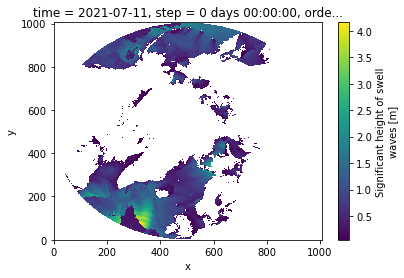

In [11]:
x.swell.plot()

In [12]:
x.herbie.crs

In [9]:
x

<xarray.Dataset>
Dimensions:              (y: 1006, x: 1006)
Coordinates:
    time                 datetime64[ns] 2021-07-11
    step                 timedelta64[ns] 00:00:00
    orderedSequenceData  float64 1.0
    valid_time           datetime64[ns] 2021-07-11
Dimensions without coordinates: y, x
Data variables:
    swell                (y, x) float32 nan nan nan nan nan ... nan nan nan nan
    gfs_wave_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   gfs_wave
    product:                 arctic.9km
    description:             Global Forecast System - Wave Products
    remote_grib:             https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20...
    local_grib:              /p/cwfs/blaylock/data/gfs_wave/20210711/gfswave....